# 4 Gram Analysis
get every word generated by a method and its frequency. 
Get the 4grams of each of the words and their frequencies. Can then make these plots. 

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

n_gram = 4
prompt_length = 100
num_batches = 4
batch_size=25

In [2]:
bad_inds = [11, 20, 29, 35, 63, 80, 84, 94]

In [3]:
# used to decode:
from decodeLogits import *
vals_dict = {'tfs':[0.25, 0.75, 0.9, 0.95, 0.99], 'flat':[0.01, 0.02, 0.05],
'n': [0.1, 0.25, 0.5, 0.63, 0.69, 0.75, 0.81, 0.9], 'k':[1,10,40,200]  }

In [4]:
seed = 27
for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par ==None:
            par = "None"
            
        print('opening file:', 'gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz')
        #all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed.pickle.gz', 'rb'))
        break
    break
        

Key is: tfs
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.25-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz


In [5]:
text[0].shape

(25, 250)

In [6]:
tot_num = 0
for i in range(num_batches):
    tot_num+= text[i].shape[0]
print('total number of samples:', tot_num)

total number of samples: 100


In [7]:
tot_good_samples = list(set(range(tot_num)) - set(bad_inds))
tot_good_samples;

# works for all but the generated text. 

# need to use moses to detokenize

In [8]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch
import copy
import re
num_samples = tot_num
num_batches = num_samples//batch_size

word_frequency_for_all = dict()
token_frequency_for_all = dict()

num_target_too_short = 0

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par ==None:
            par = "None"
        print('opening file:', 'gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz')
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed.pickle.gz', 'rb'))

        p_ind = 0
        
        word_freq_temp = dict()
        token_freq_temp = dict()
        
        for batch in range(num_batches):
            for ind in range(0,text[batch].shape[0]):

                if p_ind in bad_inds:
                    p_ind+=1
                    continue
                
                if p_ind%25 == 0:
                    pass
                    #print('index', str(p_ind))
                    
                # this is the ground truth calculations =====
                
                tokens = text[batch][ind, prompt_length:]

                decoded_text_generated = decoder_text(tokens)
                #decoded_text_generated = decoded_text_generated.lower()
                #decoded_text_generated = re.sub('\n', ' ',decoded_text_generated )
                #word_set = list(set(decoded_text_generated.split(' '))) # may be some fuction that does this
                word_list = decoded_text_generated.split(' ')
    
                for w in word_list:
                    w = w.strip()
                    #removing punctuation:
                    w = re.sub(r'[^\w\s]','',w)
                    if w in word_freq_temp.keys():
                        word_freq_temp[w] += 1
                    else:
                        word_freq_temp[w] = 1
                        
                for w in tokens:
                    if w in token_freq_temp.keys():
                        token_freq_temp[w] += 1
                    else:
                        token_freq_temp[w] = 1
                
                word_frequency_for_all[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = copy.copy(word_freq_temp)
                
                token_frequency_for_all[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = copy.copy(token_freq_temp)
                
                p_ind+=1
                


Key is: tfs
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.25-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.75-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.9-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.95-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.99-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
Key is: flat
opening file: gpt-2_output/all_logits_flat-sampling-type_0.01-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
opening file: gpt-2_output/all_logits_flat-sampling-type_0.02-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pick

In [9]:
len(word_frequency_for_all.keys())

1840

In [10]:
len(word_frequency_for_all['tfs-sampling-type_0.75prompt_1'])

42

In [11]:
pd.DataFrame.from_dict([word_frequency_for_all['tfs-sampling-type_0.75prompt_2']])

,,I,Or,You,a,about,again,and,are,back,...,should,soul,stop,the,things,thinking,to,up,you,your
0,101,2,1,11,1,1,1,9,1,1,...,1,5,1,2,1,1,1,3,9,13


# Converting words and then tokens to frequencies

In [12]:
def convToFreq(dict_to_analyze, ground=False):
    word_freq_percentage = dict()
    tot_word_occ = dict()
    if ground==False:
        for key, params in vals_dict.items():
            print('Key is:', key)
            for par in params:
                num_unique_words = []

                for counter, i in enumerate(tot_good_samples):
                    unique_num_words_temp = len(dict_to_analyze[key+'-sampling-type_'+str(par)+'prompt_'+str(i)])
                    unique_word_occurences_temp = 0
                    for k, v in dict_to_analyze[key+'-sampling-type_'+str(par)+'prompt_'+str(i)].items():
                        unique_word_occurences_temp += v
                    num_unique_words.append((unique_num_words_temp,unique_word_occurences_temp)) 
                    to_df = []
                    for k, v in dict_to_analyze[key+'-sampling-type_'+str(par)+'prompt_'+str(i)].items():
                        to_df.append( (k, v / unique_word_occurences_temp) )
                    word_freq_percentage[key+'-sampling-type_'+str(par)+'prompt_'+str(counter)] = pd.DataFrame(to_df,
                                                                                                        columns=['words', 'freq'])

                tot_word_occ[key+'-sampling-type_'+str(par)] = num_unique_words

    else:
        num_unique_words = []
        for i in range(len(tot_good_samples)):
            unique_num_words_temp = len(dict_to_analyze['ground_prompt_'+str(i)])
            unique_word_occurences_temp = 0
            for k, v in dict_to_analyze['ground_prompt_'+str(i)].items():
                unique_word_occurences_temp += v
            num_unique_words.append((unique_num_words_temp,unique_word_occurences_temp)) 
            to_df = []
            for k, v in dict_to_analyze['ground_prompt_'+str(i)].items():
                to_df.append( (k, v / unique_word_occurences_temp) )
            word_freq_percentage['ground_prompt_'+str(i)] = pd.DataFrame(to_df,
                                                                                                columns=['words', 'freq'])

        tot_word_occ['ground'] = num_unique_words

    return word_freq_percentage, tot_word_occ

In [13]:
word_freq_percentage, tot_word_occ = convToFreq(word_frequency_for_all)
token_freq_percentage, tot_token_occ = convToFreq(token_frequency_for_all)

Key is: tfs
Key is: flat
Key is: n
Key is: k
Key is: tfs
Key is: flat
Key is: n
Key is: k


In [14]:
tot_token_occ.keys() #['tfs-sampling-type_0.25']

dict_keys(['tfs-sampling-type_0.25', 'tfs-sampling-type_0.75', 'tfs-sampling-type_0.9', 'tfs-sampling-type_0.95', 'tfs-sampling-type_0.99', 'flat-sampling-type_0.01', 'flat-sampling-type_0.02', 'flat-sampling-type_0.05', 'n-sampling-type_0.1', 'n-sampling-type_0.25', 'n-sampling-type_0.5', 'n-sampling-type_0.63', 'n-sampling-type_0.69', 'n-sampling-type_0.75', 'n-sampling-type_0.81', 'n-sampling-type_0.9', 'k-sampling-type_1', 'k-sampling-type_10', 'k-sampling-type_40', 'k-sampling-type_200'])

In [16]:
tot_word_occ['tfs-sampling-type_0.75']

[(31, 109),
 (42, 171),
 (45, 226),
 (54, 315),
 (83, 409),
 (112, 517),
 (140, 591),
 (168, 731),
 (210, 852),
 (250, 982),
 (288, 1116),
 (333, 1243),
 (348, 1376),
 (349, 1377),
 (362, 1506),
 (384, 1635),
 (393, 1710),
 (400, 1816),
 (403, 1891),
 (403, 1943),
 (422, 2074),
 (431, 2172),
 (459, 2299),
 (469, 2406),
 (500, 2525),
 (510, 2657),
 (516, 2744),
 (533, 2842),
 (542, 2914),
 (554, 3035),
 (586, 3171),
 (592, 3284),
 (611, 3417),
 (620, 3539),
 (630, 3649),
 (664, 3780),
 (671, 3839),
 (683, 3958),
 (689, 4055),
 (713, 4164),
 (725, 4251),
 (736, 4356),
 (743, 4442),
 (757, 4558),
 (769, 4667),
 (771, 4751),
 (795, 4870),
 (809, 4998),
 (816, 5093),
 (830, 5212),
 (832, 5350),
 (844, 5468),
 (866, 5590),
 (870, 5705),
 (873, 5832),
 (898, 5952),
 (912, 6061),
 (918, 6178),
 (934, 6311),
 (938, 6369),
 (954, 6469),
 (963, 6555),
 (973, 6671),
 (980, 6748),
 (1003, 6862),
 (1023, 6956),
 (1032, 7089),
 (1049, 7188),
 (1057, 7300),
 (1065, 7397),
 (1067, 7488),
 (1077, 7611),

In [17]:
word_freq_percentage['tfs-sampling-type_0.25prompt_4'].head()

,words,freq
0,,0.143411
1,pass,0.005814
2,days,0.001938
3,years,0.001938
4,You,0.017442


In [18]:
token_freq_percentage['tfs-sampling-type_0.25prompt_4'].head()

,words,freq
0,1208,0.004000
1,11,0.004000
2,1528,0.001333
3,812,0.001333
4,13,0.080000


# Getting ground truth frequency

In [19]:
text = pickle.load( gzip.open('gpt-2_output/all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb'))

In [20]:
len(text[0])

23

In [21]:
new_text = []
for b in range(num_batches):
    new_text+=text[b]

In [22]:
text=new_text

In [23]:
prompt_length

100

In [24]:
new_text = []
for i in range(len(tot_good_samples)):
    text[i]

In [25]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch
import copy
import re
num_samples = tot_num
num_batches = num_samples//batch_size

word_frequency_ground = dict()
token_frequency_ground = dict()

num_target_too_short = 0

word_freq_temp = dict()
token_freq_temp = dict()

for ind in range(len(tot_good_samples)):

    tokens = text[ind][prompt_length:]

    decoded_text_generated = decoder_text(tokens)
    #decoded_text_generated = decoded_text_generated.lower()
    #decoded_text_generated = re.sub('\n', ' ',decoded_text_generated )
    #word_set = list(set(decoded_text_generated.split(' '))) # may be some fuction that does this
    word_list = decoded_text_generated.split(' ')

    for w in word_list:
        w = w.strip()
        #removing punctuation:
        w = re.sub(r'[^\w\s]','',w)
        if w in word_freq_temp.keys():
            word_freq_temp[w] += 1
        else:
            word_freq_temp[w] = 1

    for w in tokens:
        if w in token_freq_temp.keys():
            token_freq_temp[w] += 1
        else:
            token_freq_temp[w] = 1

    word_frequency_ground['ground_prompt_'+str(ind)] = copy.copy(word_freq_temp)
    token_frequency_ground['ground_prompt_'+str(ind)] = copy.copy(token_freq_temp)




In [26]:
ground_word_freq_percentage, ground_tot_word_occ = convToFreq(word_frequency_ground, ground=True)
ground_token_freq_percentage, ground_tot_token_occ = convToFreq(token_frequency_ground, ground=True)

# Plotting the frequencies

In [105]:
def freqPlotter(type_plot, dictionary, ground_dictionary, params_to_plot, prompts_wanted):
    for key, params in vals_dict.items():
        for par in params:            
            for i in prompts_wanted:
                sortedd = dictionary[key+'-sampling-type_'+str(par)+'prompt_'+str(i)].sort_values('freq', ascending=True)
                sortedd_freq = sortedd.freq.cumsum()
                
                if key=='n':
                    key_label = "Nucleus"
                elif key=='tfs':
                    key_label='TFS'
                elif key=='k':
                    key_label='Top K'
                
                if params_to_plot == None: 
                    plt.plot(sortedd.freq, sortedd_freq, label=key_label+' '+str(par), alpha=0.8)

                else:
                    if key+'_'+str(par) in params_to_plot:
                        plt.plot(sortedd.freq, sortedd_freq, label=key_label+' '+str(par), alpha=0.8)
                
    #plot the ground truth
    for i in prompts_wanted:
        
        sortedd = ground_dictionary['ground_prompt_'+str(i)].sort_values('freq', ascending=True)
        sortedd_freq = sortedd.freq.cumsum()
        plt.plot(sortedd.freq, sortedd_freq, label='Human', alpha=0.8)
        print('should be making ground')

    plt.title('Frequency vs CDF of '+type_plot+' Vocabulary for all Prompts')
    plt.xlabel(type_plot+' Frequency')
    plt.ylabel('Vocabulary CDF across all Prompts')
    plt.legend(loc='lower right')
    plt.gcf().savefig('ImageOutputs/FrequencyvsCDFof_'+type_plot+'.png', dpi=250)
    plt.show()

In [106]:
ground_token_freq_percentage['ground_prompt_91'];#.keys()

In [107]:
vals_dict

{'tfs': [0.25, 0.75, 0.9, 0.95, 0.99],
 'flat': [0.01, 0.02, 0.05],
 'n': [0.1, 0.25, 0.5, 0.63, 0.69, 0.75, 0.81, 0.9],
 'k': [1, 10, 40, 200]}

# Word Frequency

In [108]:
params_to_plot = ['tfs_0.95', 'n_0.69', 'k_40', 'k_1'] # 'tfs_0.9',  'n_0.63',
#['k_1','k_200', 'tfs_0.25','tfs_0.75', 'tfs_0.9', 'tfs_0.95','n_0.9',  'n_0.75', 'flat_0.02']
inds_to_plot = [91]

# Token Frequency

should be making ground


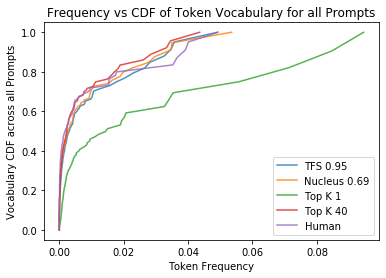

In [109]:

freqPlotter('Token', token_freq_percentage, ground_token_freq_percentage, params_to_plot, inds_to_plot)

should be making ground


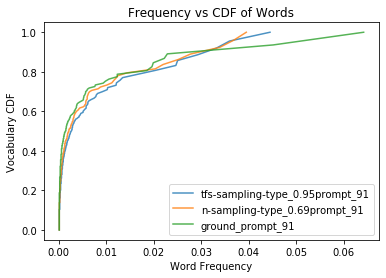

In [62]:

freqPlotter('Word', word_freq_percentage,ground_word_freq_percentage, params_to_plot, inds_to_plot)

# Statistically find the one that is closest. 
# How much word overlap, not just frequency, is there?